# Algoritmos Computacionais em Grafos - Trabalho Final

**PUC Minas**

**Engenharia de Software**

**Prof Joyce Christina de Paiva Carvalho**

* Bruno Armanelli
* Douglas Domingues
* Henrique Freire
* Luiz Antunes

## 0) Imports

A grande parte do código é python nativo. 

Para apenas um detalhe foi usado numpy, ao ler a matriz de dissimilaridade.

A biblioteca igraph foi usada ao final para visualizar os grafos.

In [381]:
from igraph import *
import numpy as np

## 1) Classes

#### Aluno
    Os alunos são os vértices dos grafos. Possuem código de aluno e área de pesquisa. São lidos a partir do arquivo 'Aluno_Area_Pesquisa.txt'
    
#### Arestas
    As arestas possuem aluno1 e aluno2, correspondendo aos alunos que conectam, e o peso. As arestas são colocadas entre os alunos mais próximos em um grupo automaticamente na inserção.
    
#### Grafo
    O grafo contem uma lista de Aluno e uma lista de Aresta. Nele estão as operações de adição de vértice (aluno), o número de alunos e o cálculo do grau de diferença.

In [382]:
class Aluno(object):
    def __init__(self, codigo, area):
        self.codigo_aluno = codigo
        self.area_pesquisa = area
    
    def __repr__(self):
        to_string = "\nCódigo Aluno: " + str(self.codigo_aluno)
        to_string += ", Área de Pesquisa: " + str(self.area_pesquisa)
        return to_string 
        

In [383]:
class Aresta(object):
    def __init__(self, aluno1, aluno2, peso):
        self.aluno1 = aluno1
        self.aluno2 = aluno2
        self.peso = peso
        
        
    def __repr__(self):
        to_string = '\n('+str(self.aluno1.codigo_aluno)+', '
        to_string += str(self.aluno2.codigo_aluno)+', '
        to_string += str(self.peso)+')'
        return to_string 

In [384]:
class Grafo(object):
    
    vertices = []
    arestas = []
    
    def __init__(self, vertices, arestas):
        self.vertices = vertices
        self.arestas = arestas

        
    def add(self, aluno):
        mais_prox = self.vertices[0]
        dist_min = dist_aluno(aluno, mais_prox)
        for v in self.vertices:
            dist = dist_aluno(aluno, v)
            if dist < dist_min:
                dist_min = dist
                mais_prox = v
        self.vertices.append(aluno)
        aresta = Aresta(aluno, mais_prox, dist_min)
        self.arestas.append(aresta)
        
    
    def diferenca(self):
        diferenca = 0
        for v in self.arestas:
            diferenca += v.peso
        return diferenca
            
        
    def grau(self):
        return len(self.vertices)
    
            
    def __repr__(self):
        return str(self.vertices) + '\n'+ str(self.arestas)
    

## 2) Leitura dos arquivos

Na leitura do arquivo 'Aluno_Area_Pesquisa.txt', as linhas são usadas para instanciar os alunos, e a lista alunos é criada.

Na leitura do arquivo 'Matriz_Dissimilaridade.txt', a matriz triangular é transformada numa matriz simétrica para facilitar o cálculo de distâncias entre as áreas de pesquisa.

In [390]:
file = open('Aluno_Area_Pesquisa.txt', 'r').read()
lines = file.split('\n')
alunos = []
for line in lines:
    line = line.split(' ')
    codigo_aluno = int(line[0])
    area_pesquisa = int(line[1])
    a = Aluno(codigo_aluno, area_pesquisa)
    alunos.append(a)
#alunos

In [387]:
def completa_matriz(matriz_triangulo):
    matriz_triangulo.sort(key=len, reverse=True)
    lado = len(matriz_triangulo)
    matriz = np.zeros((lado, lado))
    for i in range(lado):
        for j in range(len(matriz_triangulo[i])):
            matriz[i][i+j] = matriz_triangulo[i][j]
            matriz[i+j][i] = matriz_triangulo[i][j]
    return matriz
    

In [388]:
file = open('Matriz_Dissimilaridade.txt', 'r').read()
lines = file.split('\n')
matriz_triangulo = []
for l in lines:
    l = l.split(' ')
    l = list(filter(None, l))
    matriz_triangulo.append(l)
matriz = completa_matriz(matriz_triangulo)
matriz

array([[ 0., 80., 10., 15., 60., 75., 99.],
       [80.,  0., 50., 20., 25., 18., 23.],
       [10., 50.,  0., 25., 38., 85., 14.],
       [15., 20., 25.,  0., 29., 46., 13.],
       [60., 25., 38., 29.,  0., 15., 61.],
       [75., 18., 85., 46., 15.,  0., 12.],
       [99., 23., 14., 13., 61., 12.,  0.]])

## 3) Distâncias

Primeiro se define a distância entre dois alunos, baseado em suas areas de pesquisa e na matriz de dissimilaridade.

Então, é definida a distância entre dois grafos, que é a média das distâncias entre alunos de cada grafo.

In [391]:
def dist_aluno(aluno1, aluno2):
    area1 = aluno1.area_pesquisa
    area2 = aluno2.area_pesquisa
    return matriz[area1-1][area2-1]
    

In [392]:
def dist_grafo(grafo1, grafo2):
    sum_dist = 0
    for aluno1 in grafo1.vertices:
        for aluno2 in grafo2.vertices:
            sum_dist += dist_aluno(aluno1, aluno2)
    n = len(grafo1.vertices)
    m = len(grafo2.vertices)
    media_dist = sum_dist/(n*m)
    return media_dist
        

## 4) Função Principal e Aplicação

In [396]:
def particao(k, alunos):
    subgrafos = []
    for aluno in alunos:
        subgrafo = Grafo([aluno],[])
        subgrafos.append(subgrafo)  
    while len(subgrafos) > k:
        subgrafos = sorted(subgrafos, key = lambda g: (g.grau(), -g.diferenca())) #grau crescente, diferença decrescente
        s = subgrafos.pop(0)
        for aluno in s.vertices:
            subgrafos = sorted(subgrafos, key = lambda g: (g.grau(), dist_grafo(Grafo([aluno],[]), g)))
            subgrafos[0].add(aluno)
    return subgrafos

In [402]:
solucao = particao(11, alunos)
print(solucao)
len(solucao)

[[
Código Aluno: 30, Área de Pesquisa: 1, 
Código Aluno: 29, Área de Pesquisa: 1, 
Código Aluno: 31, Área de Pesquisa: 1, 
Código Aluno: 7, Área de Pesquisa: 1]
[
(29, 30, 0.0), 
(31, 30, 0.0), 
(7, 30, 0.0)], [
Código Aluno: 24, Área de Pesquisa: 4, 
Código Aluno: 12, Área de Pesquisa: 4, 
Código Aluno: 37, Área de Pesquisa: 4]
[
(12, 24, 0.0), 
(37, 24, 0.0)], [
Código Aluno: 27, Área de Pesquisa: 5, 
Código Aluno: 14, Área de Pesquisa: 5, 
Código Aluno: 13, Área de Pesquisa: 5]
[
(14, 27, 0.0), 
(13, 27, 0.0)], [
Código Aluno: 39, Área de Pesquisa: 5, 
Código Aluno: 38, Área de Pesquisa: 5, 
Código Aluno: 40, Área de Pesquisa: 5]
[
(38, 39, 0.0), 
(40, 39, 0.0)], [
Código Aluno: 34, Área de Pesquisa: 6, 
Código Aluno: 33, Área de Pesquisa: 6, 
Código Aluno: 35, Área de Pesquisa: 6]
[
(33, 34, 0.0), 
(35, 34, 0.0)], [
Código Aluno: 2, Área de Pesquisa: 1, 
Código Aluno: 1, Área de Pesquisa: 1, 
Código Aluno: 8, Área de Pesquisa: 1, 
Código Aluno: 6, Área de Pesquisa: 3]
[
(1, 2, 0.0)

11

## 5) Visualização

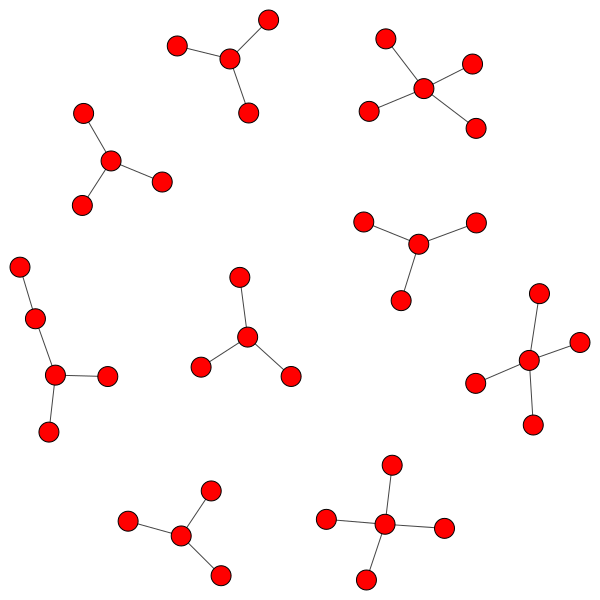

In [401]:
#visualização

g = Graph()
n_vertices = len(alunos)
g.add_vertices(n_vertices)
edges = []

for grupo in solucao:
    for aresta in grupo.arestas:
        edges.append((aresta.aluno1.codigo_aluno-1, aresta.aluno2.codigo_aluno-1))

g.add_edges(edges)        
plot(g)